In [64]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from geopy.geocoders import Nominatim
import cufflinks as cf
import plotly.express as px
import datetime as dt
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
pd.set_option('display.max_columns', None)

In [65]:
start_date = '1990/01/01'

In [66]:
start_date = start_date.replace('/','')

In [67]:
end_date = dt.datetime.today().strftime("%Y%m%d")

In [68]:
address = input("Enter City Name:")

Enter City Name:Guwahati


In [69]:
geolocator = Nominatim(user_agent="http")
location = geolocator.geocode(address)
print(location.address)
print((location.latitude, location.longitude))
latitude = location.latitude
longitude = location.longitude

Guwahati, Kamrup Metropolitan, Assam, 781015, India
(26.1805978, 91.753943)


In [70]:
url = 'https://power.larc.nasa.gov//api/temporal/daily/point?parameters=T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE&community=SB&longitude={}6&latitude={}&start={}&end={}&format=CSV'.format(longitude,latitude,start_date,end_date)

In [71]:
urllib.request.urlretrieve(url,'weather.csv')

('weather.csv', <http.client.HTTPMessage at 0x286256140>)

In [72]:
# Extract the header from the csv file.
header = ''
n_header_lines = 14 # The fixed number of header lines

with open ('weather.csv', 'r') as file:
    lines = file.readlines()
    header_lines = []
    for i in range (n_header_lines):
        header_lines.append (lines[i])
    header = ''.join (header_lines)

print (header)

-BEGIN HEADER-
NASA/POWER CERES/MERRA2 Native Resolution Daily Data 
Dates (month/day/year): 01/01/1990 through 11/17/2022 
Location: Latitude  26.1806   Longitude 91.7539 
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 400.01 meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999 
Parameter(s): 
T2M_MAX         MERRA-2 Temperature at 2 Meters Maximum (C) 
T2M_MIN         MERRA-2 Temperature at 2 Meters Minimum (C) 
RH2M            MERRA-2 Relative Humidity at 2 Meters (%) 
PRECTOTCORR     MERRA-2 Precipitation Corrected (mm/day) 
PS              MERRA-2 Surface Pressure (kPa) 
WS10M_RANGE     MERRA-2 Wind Speed at 10 Meters Range (m/s) 
-END HEADER-



In [73]:
df = pd.read_csv('weather.csv', header=n_header_lines)

In [75]:
df.tail()

,YEAR,MO,DY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE
12004,2022,11,13,25.82,14.76,81.88,0.01,96.85,1.31
12005,2022,11,14,25.87,14.88,79.25,0.00,96.85,1.62
12006,2022,11,15,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
12007,2022,11,16,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
12008,2022,11,17,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00


In [76]:
df['YEAR'] = df.YEAR.astype(str)
df['MO'] = df.MO.astype(str)
df['DY'] = df.DY.astype(str)

df['date'] = df['YEAR'].str.cat(df['MO'], sep = '/')
df['DATE'] = df['date'].str.cat(df['DY'], sep = '/')
df.head()

,YEAR,MO,DY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE,date,DATE
0,1990,1,1,19.62,5.66,78.38,0.0,96.93,1.97,1990/1,1990/1/1
1,1990,1,2,20.03,5.87,73.81,0.0,96.94,1.05,1990/1,1990/1/2
2,1990,1,3,21.14,6.32,68.69,0.0,97.00,1.69,1990/1,1990/1/3
3,1990,1,4,21.93,7.04,70.31,0.0,97.05,2.16,1990/1,1990/1/4
4,1990,1,5,20.94,7.03,73.06,0.0,97.17,1.41,1990/1,1990/1/5


In [94]:
a = df[df['DATE']=='2022/11/14']
a

,YEAR,MO,DY,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE,date,DATE
12005,2022,11,14,25.87,14.88,79.25,0.0,96.85,1.62,2022/11,2022/11/14


In [13]:
# removing unrequired attributes
df.drop(columns=['YEAR','MO','DY','date'],axis=1,inplace=True)
df.head()

,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR,PS,WS10M_RANGE,DATE
0,19.62,5.66,78.38,0.0,96.93,1.97,1990/1/1
1,20.03,5.87,73.81,0.0,96.94,1.05,1990/1/2
2,21.14,6.32,68.69,0.0,97.00,1.69,1990/1/3
3,21.93,7.04,70.31,0.0,97.05,2.16,1990/1/4
4,20.94,7.03,73.06,0.0,97.17,1.41,1990/1/5


In [14]:
# Extrapolate did_rain information from rainfall (in mm)
df['DID_RAIN'] = pd.Series.copy(df['PRECTOTCORR']).apply(lambda x : 0.0 if x == 0.0 else 1.0)

# Now drop PROCTOTCORR
df.drop (columns=['PRECTOTCORR'], axis=1, inplace=True)

In [15]:
# Handling Class imbalance
from sklearn.utils import resample

no = df[df.DID_RAIN == 0]
yes = df[df.DID_RAIN == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))

print('DID_RAIN Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
oversampled.DID_RAIN.value_counts(normalize = True).iplot(kind='bar', color= ['skyblue'])

df = oversampled

DID_RAIN Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)


<Figure size 800x500 with 0 Axes>

In [16]:
df.set_index(['DATE'], inplace = True)
df.head()

,T2M_MAX,T2M_MIN,RH2M,PS,WS10M_RANGE,DID_RAIN
DATE,,,,,,
1990/1/1,19.62,5.66,78.38,96.93,1.97,0.0
1990/1/2,20.03,5.87,73.81,96.94,1.05,0.0
1990/1/3,21.14,6.32,68.69,97.00,1.69,0.0
1990/1/4,21.93,7.04,70.31,97.05,2.16,0.0
1990/1/5,20.94,7.03,73.06,97.17,1.41,0.0


In [17]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)

            T2M_MAX  T2M_MIN   RH2M     PS  WS10M_RANGE  DID_RAIN
DATE                                                             
1990/1/1      19.62     5.66  78.38  96.93         1.97       0.0
1990/1/2      20.03     5.87  73.81  96.94         1.05       0.0
1990/1/3      21.14     6.32  68.69  97.00         1.69       0.0
1990/1/4      21.93     7.04  70.31  97.05         2.16       0.0
1990/1/5      20.94     7.03  73.06  97.17         1.41       0.0
1990/1/6      21.37     6.78  68.94  97.17         1.55       0.0
1990/1/7      22.65     8.02  68.19  97.09         2.09       0.0
1990/1/8      22.37     7.81  68.62  97.09         2.34       0.0
1990/1/9      21.27     6.97  67.56  97.00         2.29       0.0
1990/1/10     20.71     7.62  67.50  96.87         1.24       0.0
1990/1/11     21.08     6.50  70.44  96.88         1.58       0.0
1990/1/12     21.78     7.42  73.38  96.87         1.86       0.0
1990/1/13     22.83     8.03  76.12  96.70         2.00       0.0
1990/1/14 

In [18]:
target = df['DID_RAIN']
df.drop (columns=['DID_RAIN'], axis=1, inplace=True)

In [19]:
# Scaling the data - Normalize (0-1) or Standardize (gaussian data)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
print('Scaled df:\n', df_scaled, '\n', df_scaled.shape)

Scaled df:
 [[0.1436853  0.12229299 0.76362617 0.74910394 0.27580071]
 [0.16066253 0.13121019 0.69959367 0.75268817 0.11209964]
 [0.20662526 0.15031847 0.62785484 0.77419355 0.22597865]
 ...
 [0.69026915 0.91677282 0.81168558 0.390681   0.10854093]
 [0.7515528  0.85477707 0.7836626  0.34767025 0.10498221]
 [0.63850932 0.77919321 0.70141516 0.38709677 0.50355872]] 
 (7712, 5)


In [20]:
# Splitting the dataset

# Train - Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (df, target, test_size=0.2, random_state=123)

In [21]:
pd.DataFrame(X_train)

,T2M_MAX,T2M_MIN,RH2M,PS,WS10M_RANGE
DATE,,,,,
2002/1/3,22.26,8.23,64.94,97.34,1.68
2004/12/2,22.44,11.58,85.00,97.31,0.76
2006/6/8,35.34,24.26,74.00,95.60,1.88
1991/2/23,29.81,11.08,44.69,97.04,2.31
2008/1/1,21.54,8.35,82.12,96.93,1.09
...,...,...,...,...,...
2019/5/30,35.01,21.95,72.50,95.86,1.80
2001/12/14,21.91,8.58,72.75,97.21,1.22
2019/1/12,22.35,8.84,71.19,97.02,1.45


In [22]:
# Converting list to array
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6169, 5), (6169,), (1543, 5), (1543,))

In [23]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [24]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.9001944264419961
ROC Area under Curve = 0.9004494514172422
Cohen's Kappa = 0.8004792756120253
Time taken = 0.606010913848877
              precision    recall  f1-score   support

         0.0    0.87577   0.93072   0.90241       765
         1.0    0.92740   0.87018   0.89788       778

    accuracy                        0.90019      1543
   macro avg    0.90158   0.90045   0.90014      1543
weighted avg    0.90180   0.90019   0.90012      1543



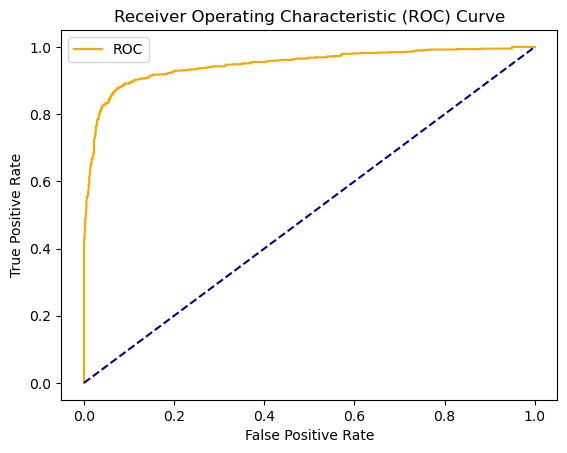

/Users/aman/miniforge3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



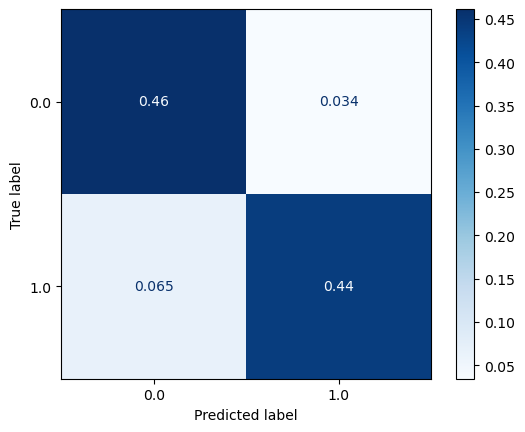

In [25]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

In [40]:
target[1990/1/1]

KeyError: 'DATE'

In [26]:
input_data = []

print('Enter the weather parameters of previous day: ')

attr1 = float(input("Enter Maximum Temperature: "))
attr2 = float(input("Enter Minimum Temperature: "))
attr3 = float(input("Enter Relative Humidity:"))
attr5 = float(input("Enter Surface Pressure: "))
attr6 = float(input("Enter Wind Speed at 10M Range: "))

input_data.append(attr1)
input_data.append(attr2)
input_data.append(attr3)
input_data.append(attr5)
input_data.append(attr6)

input_data = np.array(input_data) 
input_data.shape = (1,5)

print()
print('---------------------------------------------------------------------------------------')
print('Input Data: ', input_data)
input_data = scaler.transform(input_data)
print('Scaled Input Data:', input_data)

print()
rf_pred = 'No' if model_rf.predict(input_data)[0] == 0.0 else 'Yes'
print ('Prediction from Random   Forest     Model: ', rf_pred)

Enter the weather parameters of previous day: 


KeyboardInterrupt: Interrupted by user